<a href="https://colab.research.google.com/github/thanhcdt1820/Kiemtragiuaky/blob/main/Face.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, Flatten, Input
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pickle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def save_data(root_folder):

    dest_size = (150, 150)
    print("Bắt đầu xử lý ảnh...")

    images = []
    labels = []

    for folder in os.listdir(root_folder):
        if folder!='.DS_Store':
            print("Folder =",folder)
            for file in os.listdir(root_folder+'/'+folder):
                if file!='.DS_Store':
                    images.append(cv.resize(cv.imread(root_folder + '/' + folder +"/" + file), dsize=(150, 150)))
                    labels.append(folder)

    images = np.array(images)
    labels = np.array(labels)

    encoder = LabelBinarizer()
    labels = encoder.fit_transform(labels)
    print(labels)

    file = open('/content/drive/MyDrive/Colab Notebooks/Data.face.data', 'wb')
    pickle.dump((images,labels), file)
    file.close()

save_data('/content/drive/MyDrive/Colab Notebooks/Data.face')

Bắt đầu xử lý ảnh...
Folder = T.Thanh
Folder = M.Tan
Folder = An Tan
Folder = M.Thanh
Folder = Phat
Folder = Nhut
[[0 0 0 0 0 1]
 [0 0 0 0 0 1]
 [0 0 0 0 0 1]
 ...
 [0 0 0 1 0 0]
 [0 0 0 1 0 0]
 [0 0 0 1 0 0]]


In [ ]:
def load_data():
    file = open('/content/drive/MyDrive/Colab Notebooks/Data.face.data', 'rb')

    # dump information to that file
    (pixels, labels) = pickle.load(file)

    # close the file
    file.close()

    print(pixels.shape)
    print(labels.shape)

    return pixels, labels

images, labels = load_data()

(450, 150, 150, 3)
(450, 6)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state = 10)
X = X_test
X_train.shape

(360, 150, 150, 3)

In [ ]:
X_train = X_train.astype('float32')/255.0
X_test = X_test.astype('float32')/255.0

In [ ]:
model = Sequential()
model.add(Conv2D(64, (3, 3), strides=(1,1), padding = 'same', activation = 'relu', input_shape=(150, 150, 3)))
model.add(Conv2D(64, (3, 3),strides=(1,1), padding = 'same',  activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), strides=(1,1), padding = 'same', activation = 'relu'))
model.add(Conv2D(128, (3, 3), strides=(1,1), padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3), strides=(1,1), padding = 'same', activation = 'relu'))
model.add(Conv2D(256, (3, 3), strides=(1,1), padding = 'same', activation = 'relu'))
model.add(Conv2D(256, (3, 3), strides=(1,1), padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(512, (3, 3), strides=(1,1), padding = 'same', activation = 'relu'))
model.add(Conv2D(512, (3, 3), strides=(1,1), padding = 'same', activation = 'relu'))
model.add(Conv2D(512, (3, 3), strides=(1,1), padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(6, activation='softmax'))

model.summary()
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 75, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 128)      0         
 2D)                                                    

In [ ]:
aug = ImageDataGenerator(rotation_range=10,
                    width_shift_range=0.05,
                    height_shift_range=0.05,
                    shear_range=0.05,
                    zoom_range=0.05,
                    horizontal_flip=True,
                    fill_mode='nearest')

In [ ]:
history = model.fit_generator(aug.flow(X_train, y_train, batch_size=64), epochs=25, validation_data=aug.flow(X_test,y_test, batch_size=64))

<ipython-input-14-d88845760a12>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(aug.flow(X_train, y_train, batch_size=64), epochs=25, validation_data=aug.flow(X_test,y_test, batch_size=64))


Epoch 1/25
6/6 [==============================] - 37s 2s/step - loss: 1.7762 - accuracy: 0.2306 - val_loss: 1.7659 - val_accuracy: 0.2778
Epoch 2/25
6/6 [==============================] - 3s 526ms/step - loss: 1.7271 - accuracy: 0.2778 - val_loss: 1.6865 - val_accuracy: 0.3333
Epoch 3/25
6/6 [==============================] - 3s 475ms/step - loss: 1.5877 - accuracy: 0.4028 - val_loss: 1.4893 - val_accuracy: 0.4333
Epoch 4/25
6/6 [==============================] - 3s 525ms/step - loss: 1.2253 - accuracy: 0.5361 - val_loss: 1.6630 - val_accuracy: 0.5222
Epoch 5/25
6/6 [==============================] - 4s 514ms/step - loss: 0.9314 - accuracy: 0.7056 - val_loss: 0.8502 - val_accuracy: 0.6889
Epoch 6/25
6/6 [==============================] - 3s 473ms/step - loss: 0.6447 - accuracy: 0.8028 - val_loss: 0.4503 - val_accuracy: 0.8000
Epoch 7/25
6/6 [==============================] - 4s 697ms/step - loss: 0.4926 - accuracy: 0.8194 - val_loss: 0.5482 - val_accuracy: 0.7778
Epoch 8/25
6/6 [======

In [ ]:
model.save('/content/drive/MyDrive/Faces/Face_6.h5')

NameError: ignored

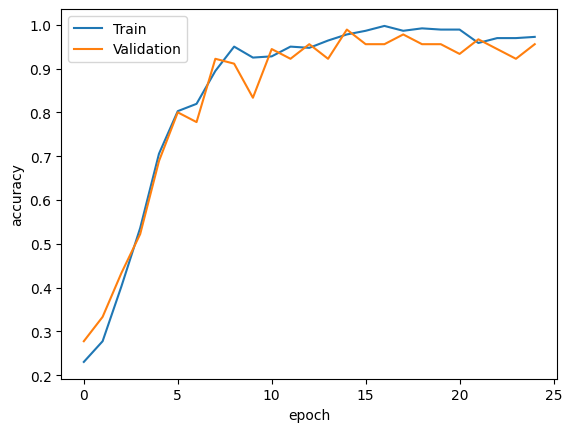

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train','Validation'],loc='upper left')
plt.show()

In [ ]:
class_name = ['An Tan','M.Tan','M.Thanh','Nhut','Phat','T.Thanh']
image = X[10]
c = cv.cvtColor(image, cv.COLOR_BGR2RGB)
plt.style.use('default')
plt.imshow(c)
plt.show()

img = X_test[10]
img = np.expand_dims(img, axis = 0)
result = model.predict(img)
print(result)
print("This picture is: ", class_name[np.argmax(result[0])], (result[0]))
print(np.max(result[0],axis=0))

NameError: ignored

In [ ]:
class_name = ['An Tan','M.Tan','M.Thanh','Nhut','Phat','T.Thanh']
image = X[10]
c = cv.cvtColor(image, cv.COLOR_BGR2RGB)
plt.style.use('default')
plt.imshow(c)
plt.show()

img = X_test[10]
img = np.expand_dims(img, axis = 0)
result = model.predict(img)
print(result)
print("This picture is: ", class_name[np.argmax(result[0])], (result[0]))
print(np.max(result[0],axis=0))

NameError: ignored

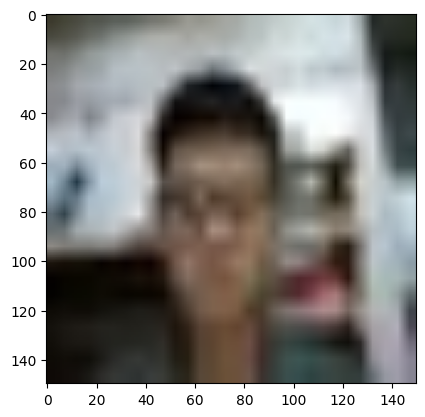

1/1 [==============================] - 0s 33ms/step
[[2.4470003e-04 4.9684179e-08 8.1632464e-07 9.9975199e-01 7.1350437e-09
  2.3843802e-06]]
This picture is:  Nhut [2.4470003e-04 4.9684179e-08 8.1632464e-07 9.9975199e-01 7.1350437e-09
 2.3843802e-06]
0.999752


In [ ]:
class_name = ['An Tan','M.Tan','M.Thanh','Nhut','Phat','T.Thanh']
image = X[33]
c = cv.cvtColor(image, cv.COLOR_BGR2RGB)
plt.style.use('default')
plt.imshow(c)
plt.show()

img = X_test[33]
img = np.expand_dims(img, axis = 0)
result = model.predict(img)
print(result)
print("This picture is: ", class_name[np.argmax(result[0])], (result[0]))
print(np.max(result[0],axis=0))

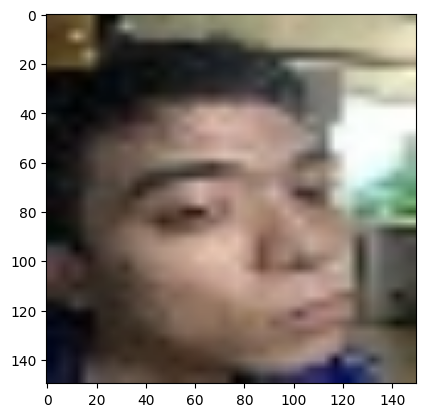

1/1 [==============================] - 0s 37ms/step
[[3.3362832e-02 6.8560994e-06 9.6404999e-01 2.0657124e-03 4.4739954e-04
  6.7079884e-05]]
This picture is:  M.Thanh [3.3362832e-02 6.8560994e-06 9.6404999e-01 2.0657124e-03 4.4739954e-04
 6.7079884e-05]
0.96405


In [ ]:
class_name = ['An Tan','M.Tan','M.Thanh','Nhut','Phat','T.Thanh']
image = X[55]
c = cv.cvtColor(image, cv.COLOR_BGR2RGB)
plt.style.use('default')
plt.imshow(c)
plt.show()

img = X_test[55]
img = np.expand_dims(img, axis = 0)
result = model.predict(img)
print(result)
print("This picture is: ", class_name[np.argmax(result[0])], (result[0]))
print(np.max(result[0],axis=0))

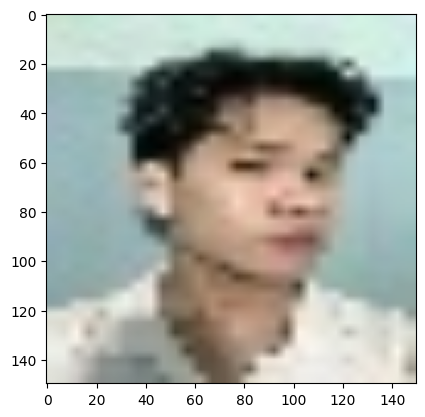

1/1 [==============================] - 0s 21ms/step
[[3.5570396e-05 1.0111949e-08 2.1986001e-07 4.2593754e-05 2.0825039e-09
  9.9992156e-01]]
This picture is:  T.Thanh [3.5570396e-05 1.0111949e-08 2.1986001e-07 4.2593754e-05 2.0825039e-09
 9.9992156e-01]
0.99992156


In [ ]:
class_name = ['An Tan','M.Tan','M.Thanh','Nhut','Phat','T.Thanh']
image = X[16]
c = cv.cvtColor(image, cv.COLOR_BGR2RGB)
plt.style.use('default')
plt.imshow(c)
plt.show()

img = X_test[16]
img = np.expand_dims(img, axis = 0)
result = model.predict(img)
print(result)
print("This picture is: ", class_name[np.argmax(result[0])], (result[0]))
print(np.max(result[0],axis=0))